<a href="https://colab.research.google.com/github/RIRI-14/Crop-Yield-er_Hackoverflow-2.0/blob/main/Farmers_Biotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Blue Flame

We have imported our dataset from Kaggle : https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

# Importing Datasets

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive
!mkdir polynomial_data

/content/drive/MyDrive
mkdir: cannot create directory ‘polynomial_data’: File exists


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
%cd polynomial_data/

/content/drive/MyDrive/polynomial_data


In [ ]:
%cp /content/Polynomial_train.csv /content/drive/MyDrive/polynomial_data
%cp /content/Polynomial_test.csv /content/drive/MyDrive/polynomial_data

cp: cannot stat '/content/Polynomial_train.csv': No such file or directory
cp: cannot stat '/content/Polynomial_test.csv': No such file or directory


In [ ]:
!ls

Polynomial_test.csv  Polynomial_train.csv


In [ ]:
train_path = '/content/drive/MyDrive/polynomial_data/Polynomial_train.csv'
test_path = '/content/drive/MyDrive/polynomial_data/Polynomial_test.csv'

train = pd.read_csv (train_path)
test = pd.read_csv (test_path)

In [ ]:
train = train.dropna()
test = test.dropna();

## Checking Imported data

In [ ]:
train.head(5)

,Value,avg_temp,average_rain_fall_mm_per_year,Value.1
0,121.00,25.58,327,14000
1,121.00,25.52,327,14000
2,121.00,25.67,327,14260
3,376.93,26.28,327,17064
4,439.89,25.17,327,17177


In [ ]:
test.head(5)

,Value,avg_temp,average_rain_fall_mm_per_year,Value.1
0,121.00,25.58,327.0,14000
1,121.00,25.52,327.0,14000
2,121.00,25.67,327.0,14260
7,376.93,26.28,327.0,17064
8,439.89,25.17,327.0,17177


In [ ]:
# removing the "unnamed: 0" column

#train = train.drop("Unnamed: 0", axis = 1)
#test = test.drop("Unnamed: 0", axis = 1)

In [ ]:
train.head(3)

,Value,avg_temp,average_rain_fall_mm_per_year,Value.1
0,121.0,25.58,327,14000
1,121.0,25.52,327,14000
2,121.0,25.67,327,14260


In [ ]:
test.head(3)

,Value,avg_temp,average_rain_fall_mm_per_year,Value.1
0,121.0,25.58,327.0,14000
1,121.0,25.52,327.0,14000
2,121.0,25.67,327.0,14260


#Training Data

In [ ]:
# converting train DataFrame to array

train = np.array(train) 

# separating X, Y, Z, label

X = train [:,0].reshape((train.shape[0],1))

Y = train [:,1].reshape((train.shape[0],1))

Z = train [:,2].reshape((train.shape[0],1))

label = train [:,-1].reshape((train.shape[0],1))

In [ ]:
# checking the shape of X

X.shape 

(301, 1)

In [ ]:
# checking the shape of Y

Y.shape 

(301, 1)

In [ ]:
# checking the shape of Z

Z.shape 

(301, 1)

In [ ]:
# checking the shape of label

label.shape 

(301, 1)

### Creating new Train dataset

In [ ]:
# getting degree one matrix

O = np.ones([X.shape[0],1]) # Ones Matrix

deg_one = np.concatenate((O,X,Y,Z), axis = 1) # degree one polynomial

pd.DataFrame(deg_one).head(3)

,0,1,2,3
0,1.0,121.0,25.58,327.0
1,1.0,121.0,25.52,327.0
2,1.0,121.0,25.67,327.0


## Training new Test data

In [ ]:
# converting test DataFrame to array

test = np.array(test) 

# separating X_test, Y_test, Z_test, label_test

X_test = test [:,0].reshape((test.shape[0],1))

Y_test = test [:,1].reshape((test.shape[0],1))

Z_test = test [:,2].reshape((test.shape[0],1))

label_test = test [:,-1].reshape((test.shape[0],1))


In [ ]:
# getting degree one matrix

O = np.ones([X_test.shape[0],1]) # Ones Matrix

deg_one_test = np.concatenate((O, X_test ,Y_test ,Z_test), axis = 1) # degree one polynomial

pd.DataFrame(deg_one_test).head(3)

,0,1,2,3
0,1.0,121.0,25.58,327.0
1,1.0,121.0,25.52,327.0
2,1.0,121.0,25.67,327.0


In [ ]:
# normalizing degree one test data

# mean normalization

for a in range( 1, deg_one_test.shape[1] ):

  mean = int (np.mean( deg_one_test[:,a]))

  deviate = ( np.amax( deg_one_test[:,a] ) - np.amin( deg_one_test[:,a]))

  for b in range(deg_one_test.shape[0]):

   deg_one_test[b,a] = ( deg_one_test[b,a] - mean ) / deviate

for c in range (label_test.size):

  label_test[c,0] =  ( label_test[c,0] - np.mean( label_test ) ) / ( np.amax( label_test ) - np.amin( label_test ))

## Function

### Degree One

In [ ]:
def one (deg_one, label, alpha, iteration):

  m = label.size # training set length

  theta = np.zeros( (deg_one.shape[1] , 1) ) # initializing theta

  cost_list = [] # to store cost Function

  # mean normalization

  for i in range( 1, deg_one.shape[1] ):

     mean = np.mean( deg_one[:,i])

     deviate = ( np.amax( deg_one[:,i] ) - np.amin( deg_one[:,i]))

     for j in range(deg_one.shape[0]):

       deg_one[j,i] = ( deg_one[j,i] - mean ) / deviate


  for k in range (label.size):

    label[k,0] =  ( label[k,0] - np.mean( label ) ) / ( np.amax( label ) - np.amin( label ))
  

  for z in range(iteration): 

   

      label_pred = np.dot(deg_one, theta) # hypothesis

      cost = (1/(2*m))* np.sum(np.square(label_pred - label)) # Cost Function

      d_cost = (1/m)* np.sum(np.dot(deg_one.T, (label_pred - label) )) # differentiating Cost Function w.r.t Theta

      temp = theta # storing theta in a temp variable

      temp = theta - alpha * d_cost # calculating new temp

      theta = temp # updating theta

      cost_list.append(cost) # updating cost Function list


      # to see if cost is decreasing

      if z % 2000 == 0:
        print("Cost is", cost)

      

  return theta , cost_list

In [ ]:
iteration = 10000

alpha = 0.001

theta1 , cost_list = one (deg_one, label, alpha = alpha, iteration = iteration)

Cost is 0.03631769669050189
Cost is 0.036053955667382946
Cost is 0.036050916486302466
Cost is 0.03605088146474408
Cost is 0.03605088106117827


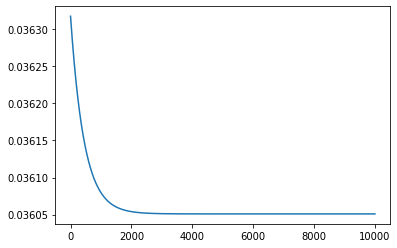

In [ ]:
iter = np.arange( 0, iteration)
plt.plot(iter, cost_list)
plt.show()

# Error

## Checking error for degree one

In [ ]:
label_test_pred = np.dot(deg_one_test, theta1)

m = label_test.size

error1 = (1/m)*np.sum(np.abs(label_test_pred - label_test))

rms_error1 = np.sqrt( np.mean( (label_test_pred - label_test) **2 ))

print(rms_error1)

print(error1)

0.337427254074888
0.26423939870459173
